# Intro to Julia for Roboticists
This intro assumes a solid understanding of scientific computing, and proficiency in a high-level language such as Matlab or Python.
The goal of the notebook is to introduce the critical concepts needed to transition quickly to Julia and starting developing code for real problems.

## Why Julia?
**QUESTION**: What language do you use first?  
**QUESTION**: What do you do when performance becomes critical?

Julia attempts to solve the "two language" problem by offering a convenient, powerful syntax while offering exceptional performance.

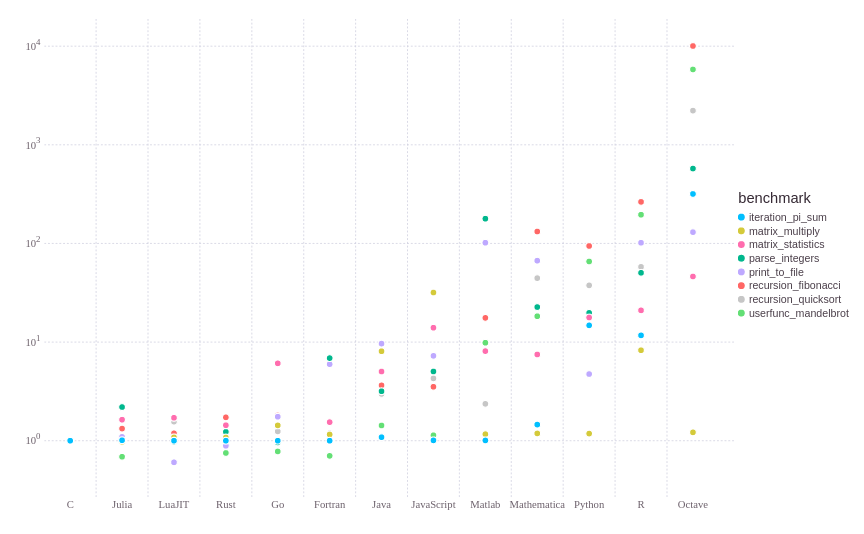

## How it Compare?
| | Julia | Matlab | Python | C++ |
|-|-------|--------|--------|-----|
|Compilation| JIT | Dynamic | Dynamic | Static |
|Age| 9 years | 37 years | 30 years | 36 years |
|OOP?| Multiple Dispatch | Kinda | Yes | Yes |
|Indexing| 1-based | 1-based | 0-based | 0-based |

## Installation
1. Download the current [release](https://julialang.org/downloads/)
2. Extract somewhere convenient (not in Downloads).
3. Add `julia-1.x.x/bin` to your system path
4. All Julia packages and related content gets stored in `~/.julia`

# Awesome Packages
Another reason Julia is great is that there are a lot of great packages for scientific computing, and they all play very "nice" with each other. For example, let's look at solving the following optimization problem:

$$ \begin{align} 
&\text{maximize} && 5x + 3y \\
&\text{subject to} && x + 5y \leq 3 \\
&&& 0 \leq x \leq 2 \\
&&& 0 \leq y \leq 30 \\
\end{align}$$

We can solve this easily (with lots of different solvers!) with JuMP.jl, an optimization modelling language in Julia (show in REPL).

## The Basics
### Numeric Types

In [64]:
# Numeric Types
a = 3_000_000  # Int64 (or 8,16,32,128)
b = 0b1100     # UInt8 (or 16,32,64,128)
c = 0xffff     # UInt16 (or 8,32,64,128)
d = 2.0        # Float64
e = 3.0f0      # Float32
f = 1 // 2     # Rational{Int64}
g = 1 + 2im    # Complex{Int}
h = 1.0 + 2im  # Complex{Float64}
π              # Irrational (also just pi)
Inf            # Float64
NaN;           # Float64

In [2]:
# Integer division
10 ÷ 3  # \div<tab>
10 ÷ 3

3

### Strings and Printing

In [3]:
# Printing
curdir = @__DIR__     # this is a macro
println("Current directory: ", curdir)

Current directory: /home/brian/Code/JuliaIntro/src


In [5]:
# string interpolation
b = isdir(curdir)
println("Is it a valid directory? $b")  

Is it a valid directory? true


In [6]:
# string concatenation
file = "JuliaIntro"
ext = ".jl"
filename = file * ext

"JuliaIntro.jl"

**QUESTION**: Why do you think they used multiplication instead of addition? (TIP: think mathematical properties of addition and multiplication)

In [7]:
# Symbols
method = :newton
printstyled("Using $method method\n", bold=true, color=:cyan)  # just for fun

Using newton method


Symbols tend to be used when comparison is what it most important. These get hashed so comparison is very fast

## Arrays
### Array Basics

In [8]:
# Construction
x = [1,2,3]    # 1D vector
y = [1 2 3]    # row vector
z = [1; 2; 3]  # column vector
A = [1 2; 3 4] # 2x2 matrix

2×2 Array{Int64,2}:
 1  2
 3  4

In [11]:
# Initializers
zeros(3,3)       # 3x3 matrix of 0s
zeros(Bool,3)    # Vector of false (better to use falses(3))
ones(3,1)        # 3x1 matrix of 1s
fill(10, 3,4)    # 3x4 matrix 10s (integer)
fill(12., 3,4,2) # 3x4x1 array of 12s (Float64)
rand(3)          # 3-element vector sampled from uniform [0,1]
randn(3,3)       # 3x3 matrix sampled from normal distribution
rand(0:10,3,2)   # 3x2 matrix sampled from 0:10
B = rand(size(A)...)  # splat the size

2×2 Array{Float64,2}:
 0.0756362  0.181755
 0.0278455  0.472158

In [12]:
# Basic operations and broadcasting
x + z             # element-wise addition
2*x               # scalar multiplication
2x                # scalar multiplication (syntatic sugar)
2 .+ x            # scalar addition
sin.(x)           # element-wise sin
x.^2;             # element-wise power

In [13]:
# Assignment and copying
B = A
B[1] = 20    # alias for A
display(A)   # better for printing arrays

C = zero(A)  # 0s matrix of the same size and type of A
C .= A       # copy the elements of A to C
C[1] = 30 
A            # didn't change it

2×2 Array{Int64,2}:
 20  2
  3  4

2×2 Array{Int64,2}:
 20  2
  3  4

In [15]:
# Testing equality
C .= A         # copy A to C
@show A == C   # are all the element equal
@show A ≈ C    # approximately equal (\approx<tab>)
@show A === C  # same memory?
@show A === B; # same memory?

A == C = true
A ≈ C = true
A === C = false
A === B = true


### Indexing and Slicing

In [17]:
A = rand(4,3)
A[1:2,:]                # use integer ranges for slicing (inclusive indexing)
A[:,[true,false,true]]  # can also use Booleans
A[5] == A[1,2]          # supports linear and cartesian indexing (column-major)

true

To get a slice that modifies the parent (and to avoid copying the data), use `view`

In [18]:
# views
subA = view(A,2:3,1:2)
subA[2,2] = 100
A

4×3 Array{Float64,2}:
 0.78731     0.151824  0.176585
 0.737863    0.759953  0.791017
 0.661706  100.0       0.337174
 0.890779    0.353082  0.781728

In [20]:
# assigning to a slice
A[:,2] .= 2              # need to broadcast the assignement
A[1,:] = fill(2.0, 3)    # no need to broadcast (or create a view)

3-element Array{Float64,1}:
 2.0
 2.0
 2.0

## Linear Algebra
For more advanced linear algebra routines we need to load the LinearAlgebra package from the standard Julia library.

In [22]:
using LinearAlgebra

In [24]:
# New types and initializers
D = Diagonal([1,2,3])
S = Symmetric(rand(3,3))
I(3);   # 3x3 identity matrix

In [25]:
# Basic linear algebra
norm(x)      # 2-norm
norm(x,Inf)  # infinity norm
x = rand(3)
y = rand(3)
A*D          # matrix multiplication
A'A          # transpose multiplication (shortcut for A'*A)
x'x          # dot product (same as dot(x))
x'S*x        # quadratic form (same as dot(x,S,s))
x × y        # cross product (same as cross(x,y)) \times
x*y';        # outer product

### Solving Linear Systems
**QUESTION**: How do we efficiently solve $ A x = b $?

In [26]:
A = rand(10,10)
b = rand(10)
x = A\b          # solve the linear system

A = rand(10,5)
x = A\b          # solve the least squares problem

A = rand(10,15)
x = A\b;         # solve the least-norm problem

In [163]:
cholA = cholesky(A)
@show typeof(cholA)
cholA.L    # get the factorization
cholA \ b  # perform forward-backward substitution

qrA = qr(A)
qrA.Q      # get the Q matrix
qrA.R      # get the R matrix
qrA \ b;   # efficiently solve the least-squares system

typeof(cholA) = Cholesky{Float64,Array{Float64,2}}


In [27]:
import Pkg; Pkg.add("BenchmarkTools")  # add a new package
using BenchmarkTools

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%


   Updating registry at `~/.julia/registries/LyceumRegistry`
   Updating git-repo `https://github.com/Lyceum/LyceumRegistry.git`


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [284]:
Ā = rand(100,100);
A = Ā'Ā  # make it symmetric
bs = [rand(100) for i = 1:10]
printstyled("Single solve\n", bold=true, color=:blue)
print("Naive inversion:")
@btime inv($A)*$bs[1]
print("Backslash:")
@btime $A\$bs[1]
print("Cholesky:")
@btime cholesky($A)\$bs[1];

printstyled("\n10 solves\n", bold=true, color=:blue)
print("Naive inversion:")
@btime [inv($A)*b for b in $bs]
print("Backslash:")
@btime [$A\b for b in $bs]
print("Cholesky:")
@btime begin
    cholA = cholesky($A)    # only factorize once
    [cholA \ b for b in $bs]
end;

Single solve
Naive inversion:  1.308 ms (6 allocations: 130.11 KiB)
Backslash:  1.221 ms (4 allocations: 79.95 KiB)
Cholesky:  91.409 μs (5 allocations: 79.13 KiB)

10 solves
Naive inversion:  22.719 ms (61 allocations: 1.27 MiB)
Backslash:  19.597 ms (41 allocations: 799.69 KiB)
Cholesky:  151.670 μs (15 allocations: 87.16 KiB)


When using matrix factorizations in Julia, use the matrix factorization types:

In [28]:
?svd # Get more info on the factorization method

search: svd svd! SVD svdvals svdvals! GeneralizedSVD isvalid CholeskyPivoted



```
svd(A; full::Bool = false, alg::Algorithm = default_svd_alg(A)) -> SVD
```

Compute the singular value decomposition (SVD) of `A` and return an `SVD` object.

`U`, `S`, `V` and `Vt` can be obtained from the factorization `F` with `F.U`, `F.S`, `F.V` and `F.Vt`, such that `A = U * Diagonal(S) * Vt`. The algorithm produces `Vt` and hence `Vt` is more efficient to extract than `V`. The singular values in `S` are sorted in descending order.

Iterating the decomposition produces the components `U`, `S`, and `V`.

If `full = false` (default), a "thin" SVD is returned. For a $M \times N$ matrix `A`, in the full factorization `U` is `M \times M` and `V` is `N \times N`, while in the thin factorization `U` is `M \times K` and `V` is `N \times K`, where `K = \min(M,N)` is the number of singular values.

If `alg = DivideAndConquer()` a divide-and-conquer algorithm is used to calculate the SVD. Another (typically slower but more accurate) option is `alg = QRIteration()`.

!!! compat "Julia 1.3"
    The `alg` keyword argument requires Julia 1.3 or later.


# Examples

```jldoctest
julia> A = rand(4,3);

julia> F = svd(A); # Store the Factorization Object

julia> A ≈ F.U * Diagonal(F.S) * F.Vt
true

julia> U, S, V = F; # destructuring via iteration

julia> A ≈ U * Diagonal(S) * V'
true

julia> Uonly, = svd(A); # Store U only

julia> Uonly == U
true
```

---

```
svd(A, B) -> GeneralizedSVD
```

Compute the generalized SVD of `A` and `B`, returning a `GeneralizedSVD` factorization object `F` such that `[A;B] = [F.U * F.D1; F.V * F.D2] * F.R0 * F.Q'`

  * `U` is a M-by-M orthogonal matrix,
  * `V` is a P-by-P orthogonal matrix,
  * `Q` is a N-by-N orthogonal matrix,
  * `D1` is a M-by-(K+L) diagonal matrix with 1s in the first K entries,
  * `D2` is a P-by-(K+L) matrix whose top right L-by-L block is diagonal,
  * `R0` is a (K+L)-by-N matrix whose rightmost (K+L)-by-(K+L) block is          nonsingular upper block triangular,

`K+L` is the effective numerical rank of the matrix `[A; B]`.

Iterating the decomposition produces the components `U`, `V`, `Q`, `D1`, `D2`, and `R0`.

The generalized SVD is used in applications such as when one wants to compare how much belongs to `A` vs. how much belongs to `B`, as in human vs yeast genome, or signal vs noise, or between clusters vs within clusters. (See Edelman and Wang for discussion: https://arxiv.org/abs/1901.00485)

It decomposes `[A; B]` into `[UC; VS]H`, where `[UC; VS]` is a natural orthogonal basis for the column space of `[A; B]`, and `H = RQ'` is a natural non-orthogonal basis for the rowspace of `[A;B]`, where the top rows are most closely attributed to the `A` matrix, and the bottom to the `B` matrix. The multi-cosine/sine matrices `C` and `S` provide a multi-measure of how much `A` vs how much `B`, and `U` and `V` provide directions in which these are measured.

# Examples

```jldoctest
julia> A = randn(3,2); B=randn(4,2);

julia> F = svd(A, B);

julia> U,V,Q,C,S,R = F;

julia> H = R*Q';

julia> [A; B] ≈ [U*C; V*S]*H
true

julia> [A; B] ≈ [F.U*F.D1; F.V*F.D2]*F.R0*F.Q'
true

julia> Uonly, = svd(A,B);

julia> U == Uonly
true
```


## Functions
Since Julia is JIT compiled, the first function call will always be much slower.

In [29]:
function mysum(x)
    out = zero(eltype(x))
    for a in x
        out += a
    end
    return out
end
x = randn(1000)
print("First time:"); @time mysum(x);
print("Second time:"); @time mysum(x);

First time:  0.011414 seconds (4.80 k allocations: 229.597 KiB)
Second time:  0.000006 seconds (1 allocation: 16 bytes)


In [30]:
Pkg.add("PyCall")
using PyCall

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [31]:
np = pyimport("numpy")
py"""
def pysum(x):
    out = 0
    for a in x:
        out += a
    return out
""";

Let's look at the performance of our super simple sum function versus Python:

In [32]:
print("Built-in sum:"); @btime sum($x);
print("Our sum:     "); @btime mysum($x);
print("Numpy sum:   "); @btime np.sum($x);
print("Python sum:  "); @btime py"pysum"($x);

Built-in sum:  51.215 ns (0 allocations: 0 bytes)
Our sum:       1.224 μs (0 allocations: 0 bytes)
Numpy sum:     7.266 μs (9 allocations: 480 bytes)
Python sum:    176.533 μs (10 allocations: 496 bytes)


**SUMMARY**: Julia loops are fast! No need to contort your code to vectorize it. Keeps algorithms easy to read, debug, and understand.

### Default function arguments
Default values can be specified in the arguments. Keyword arguments (supplied in any order), are specified after a semi-colon.

In [33]:
function foo(a,b,c=10; verbose=false)
    out = 0
    while out < c
        verbose && println(out)
        out += a / b
    end
end

# valid function calls
foo(1,2)
foo(1,2,5)
foo(1,2,1, verbose=true)
foo(1,2, verbose=false)

0
0.5


### Varargs
An arbitrary number of arguments can be accepted with the splatting syntax:

In [34]:
function bar(x...)
    out = 0
    for (a,i) in enumerate(x)
        out += a*i
    end
    out  # returns the last statement by default
end
bar(1,2)
bar(1,2,3)
x = 0:10
bar(x...)  # can also splat when calling

440

## Multiple Dispatch and Custom Types
Julia is not object-oriented. Rather, you could say it is type-oriented. We can replicate much of the same behavior of classes by defining custom types.


### Custom Types
Let's define a custom imaginary numbers type, and define a few methods on. Note that when we overload existing methods, we either have use `import` or specify the parent module.

In [295]:
struct MyIm
    real::Float64
    imag::Float64
end

# Getters (need to specify the Base module here)
Base.real(im::MyIm) = im.real
Base.imag(im::MyIm) = im.imag

# Arithmetic
import Base: *, +   # import the operators so we can overwrite them
function *(a::MyIm, b::MyIm) 
    r = real(a) * real(b) - imag(a) * imag(b)
    i = + real(a) * imag(b) + imag(a) * imag(a)
    MyIm(r,i)
end
function +(a::MyIm, b::MyIm)
    MyIm(real(a) + real(a), imag(b) + imag(b))
end

function foo(a::MyIm)  # custom method
    real(a) * imag(b) + real(a)
end


1.0

Now let's instantiate our type and test out our methods

In [296]:
a = MyIm(1,2)  # note that it does automatic promotion to Floats
b = MyIm(2,1.5)
@show a*b
@show a+b
@show foo(a);

a * b = MyIm(-1.0, 5.5)
a + b = MyIm(2.0, 3.0)
foo(a) = 2.5


Note that if we try something we haven't defined, like subtraction, then it throws an error:

In [297]:
a - b

LoadError: MethodError: no method matching -(::MyIm, ::MyIm)
Closest candidates are:
  -(!Matched::PyObject, ::Any) at /home/brian/.julia/packages/PyCall/tqyST/src/pyoperators.jl:13
  -(::Any, !Matched::PyObject) at /home/brian/.julia/packages/PyCall/tqyST/src/pyoperators.jl:14

### Inheritance
All types in Julia are arranged in a type tree, and therefore can have parent and children types. However, only the leaves of the tree can actually be instantiated. All parent types are abstract. Let's show the Julia version of inheritance with the canoncial shape example:

In [229]:
# defined the abstract parent type, and a few default methods
abstract type AbstractRectangle end
area(r::AbstractRectangle) = width(r) * height(r)
perimeter(r::AbstractRectangle) = 2*width(r) + 2*height(r)

#= 
these methods will work as long as any child types 
define the width and height methods
=#

struct Rectangle <: AbstractRectangle
    width::Int
    height::Int
end
width(r::Rectangle) = r.width
height(r::Rectangle) = r.height

struct Square <: AbstractRectangle
    width::Int
end
width(s::Square) = s.width
height(s::Square) = s.width
perimeter(s::Square) = 4*width(s)  # we can special-case this method, if we want

square = Square(3)
rect = Rectangle(3,4)
@show area(square)
@show perimeter(rect);


area(square) = 9
perimeter(rect) = 14


# Package Manager
One of the nice things about Julia is it's built-in package management system. It's very easy to use (most of the time), and allows you to set up virtual environments as well. You can use the `Pkg` API programatically, if you want, but the easiest way is to the the REPL tool. Just start up a julia REPL in your terminal (by calling the julia binary, e.g. `julia`).  

Once it boots up, hit the `]` key to open the package manager. The REPL will turn blue and show your current environment, which will default to the Julia version you are using.

In the package manager, you can use these methods:
```
add MyPackage
add MyPackage@0.2     # add version v0.2
add MyPackage#master  # add the master branch
rm MyPackage          # remove
st                    # list all the packages you have installed in your environment
activate dir          # activate the environment in directory dir
```

# Performance Tips
Julia has an excellect section in their manual on [performance tips](https://docs.julialang.org/en/v1/manual/performance-tips/). Here's a few key ones:
* Avoid global variables
* Make your functions type stable (for the same input types, always has the same output type)
* Consider using views instead of slices
* Access arrays by column (Julia arrays are column-major)

## Julia Type System
Rather than being object-oriented programming language, you could say that Julia is a type-oriented programming language. It's often important to understand what types you are working with, and how types relate to each other. The type system in Julia is what's primarily responsible for Julia's "magic." It's a highly complex system with lots of nuance, but the basics are pretty easy. 

All types in Julia are part of the "type tree." Thus a type can have parents and children. However, only leaf types can be instantiated. All other types are abstract. Here's a nice graphic showing a portion of the Julia type tree:

<div>
<img src="attachment:115bc466-a279-46be-883b-5794360e2716.png" width="500"/>
</div>

These types all support some basic operations:

In [2]:
printstyled("Ask if a type is a sub-type of another type\n", bold=true, color=:blue)
@show Int <: Integer
@show Signed <: AbstractFloat

printstyled("\nAsk if something is particular type\n", bold=true, color=:blue)
@show 1.0 isa Float64
@show 1.0f0 isa Float32
@show 0x01 isa Unsigned
@show 2 isa String
@show "a" isa String;

Ask if a type is a sub-type of another type
Int <: Integer = true
Signed <: AbstractFloat = false

Ask if something is particular type
1.0 isa Float64 = true
1.0f0 isa Float32 = true
0x01 isa Unsigned = true
2 isa String = false
"a" isa String = true


### Parametric Types
Some types are *parameterized* on other types. For example, we can have a complex number that is a complex integer or a complex float. This can be specified efficiently using a type parameter:

In [3]:
@show typeof(1 + 2im)
@show typeof(1.0 + 2.0im)
@show 1 + 4im isa Complex{Int}
@show 2.0 + 4.0im isa Complex{Int};

typeof(1 + 2im) = Complex{Int64}
typeof(1.0 + 2.0im) = Complex{Float64}
1 + 4im isa Complex{Int} = true
2.0 + 4.0im isa Complex{Int} = false


In [4]:
A = zeros(3,3)
x = zeros(3)
@show typeof(A)
@show typeof(x)
@show eltype(A)
@show A isa Matrix
@show x isa Matrix
@show x isa Vector;
@show Vector;

typeof(A) = Array{Float64,2}
typeof(x) = Array{Float64,1}
eltype(A) = Float64
A isa Matrix = true
x isa Matrix = false
x isa Vector = true
Vector = Array{T,1} where T


## Multiple Dispatch
**Key Idea**: Methods are called based on the types of their inputs. A function picks the method based on the types and number of arguments *at runtime*.

In practice, this is very similar to operator or function overloading seen in other languages.

Example: